In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#### Dataset

Link - https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
print(len(cols))
df = pd.read_csv('magic04.data', names=cols)
df.head()

11


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class'] = (df['class'] == 'g').astype(int)  # Convert 'g' to 1 and 'h' to 0
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


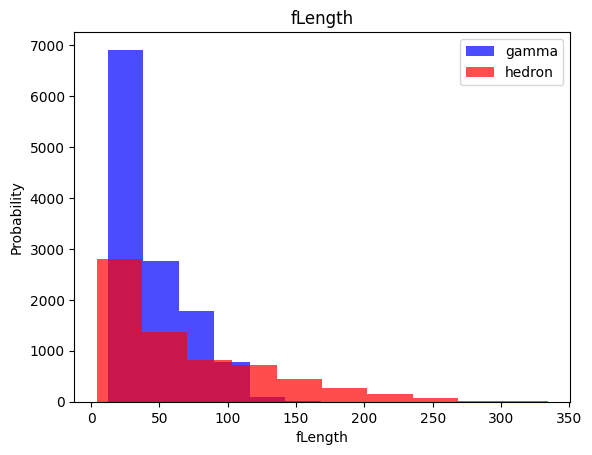

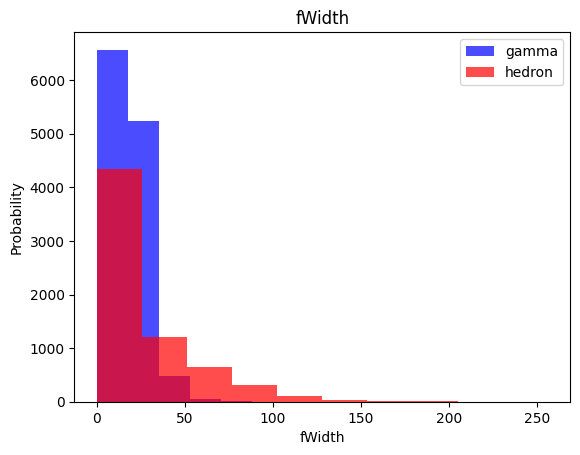

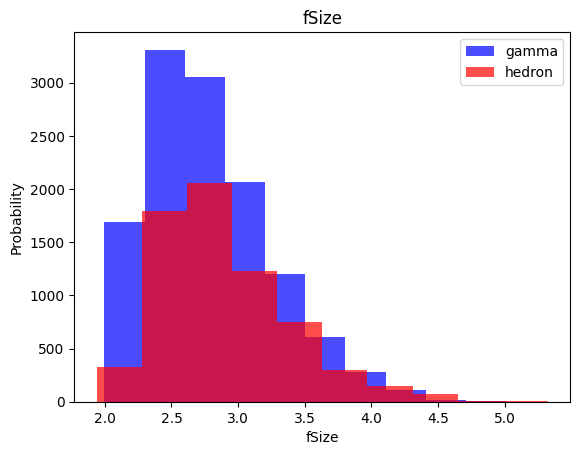

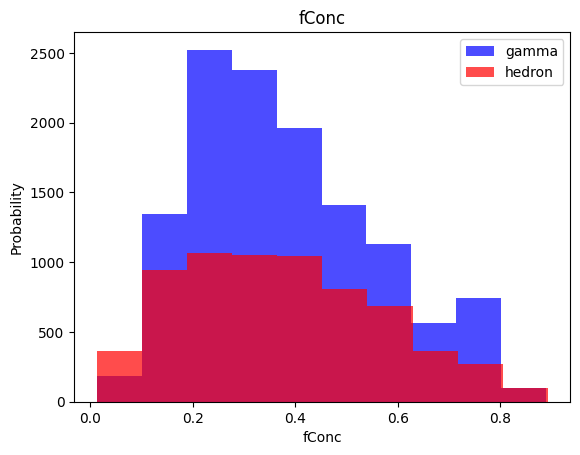

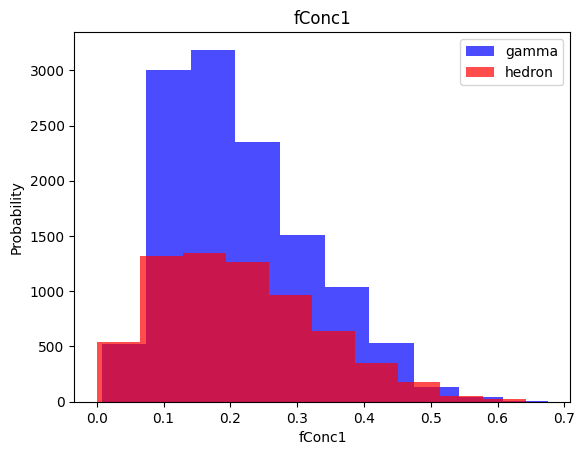

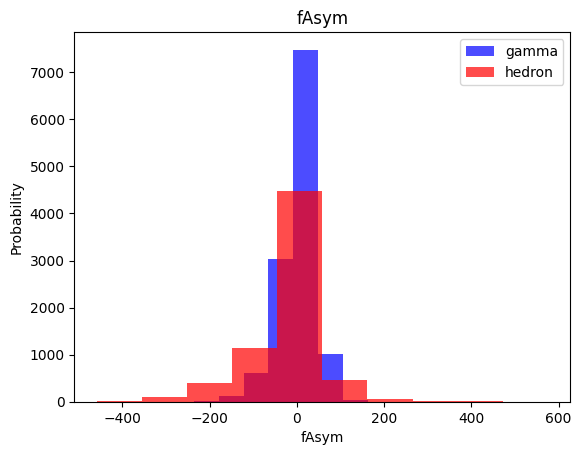

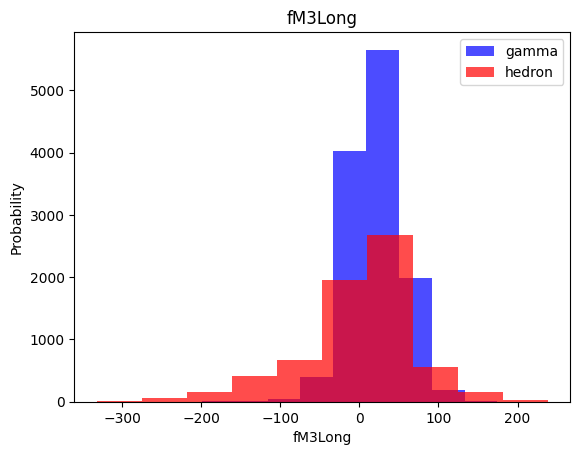

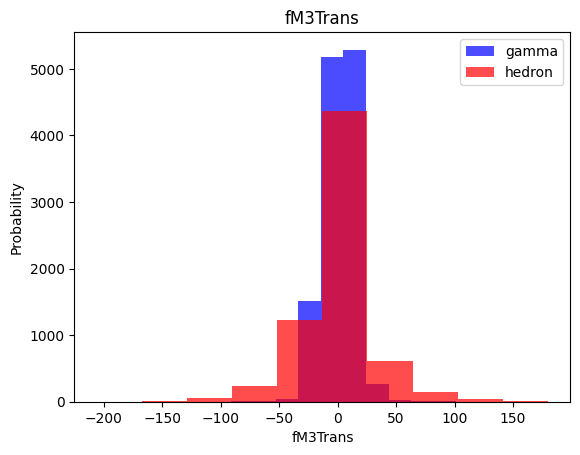

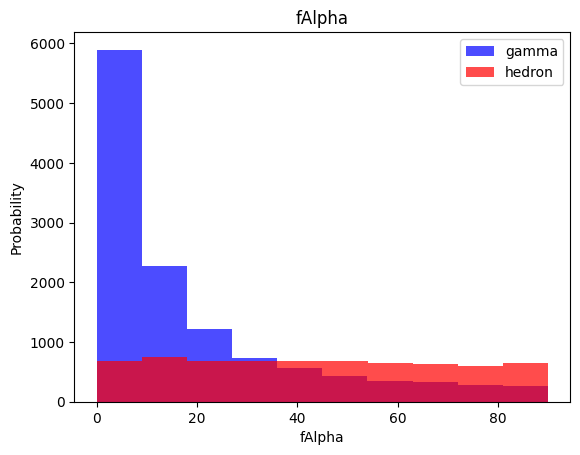

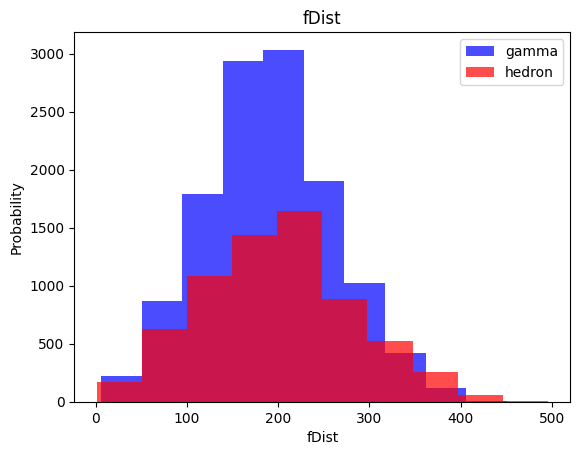

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hedron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

In [242]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\janit\miniconda3\envs\venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Let's dive into the **mathematical perspective** of **StandardScaler**. The goal of **standardization** is to transform a given dataset such that the transformed data has the following properties:

1. **Mean = 0**
2. **Standard Deviation = 1**

Mathematically, the **standardization formula** is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

* $x$ = original value of the data point.
* $\mu$ = **mean** of the feature (i.e., the average value of that feature across all data points).
* $\sigma$ = **standard deviation** of the feature (i.e., a measure of how spread out the values of the feature are).
* $z$ = standardized value (the result after applying the transformation).

### Steps to Standardize Data (Mathematically):

Given a dataset with a single feature (for simplicity), the steps to standardize it are:

1. **Compute the Mean ($\mu$) of the Feature**:
   The mean of a feature $X$ (which has $n$ data points) is computed as:

   $$
   \mu = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$

   Where:

   * $x_i$ is the value of the feature at data point $i$.
   * $n$ is the total number of data points.

2. **Compute the Standard Deviation ($\sigma$) of the Feature**:
   The standard deviation of a feature $X$ is given by:

   $$
   \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
   $$

   Where:

   * $x_i$ is the value of the feature at data point $i$.
   * $\mu$ is the mean calculated in the previous step.
   * $n$ is the total number of data points.

3. **Standardize the Data**:
   After computing the mean ($\mu$) and standard deviation ($\sigma$), you can now standardize each value $x_i$ by using the formula:

   $$
   z_i = \frac{x_i - \mu}{\sigma}
   $$

   This gives the **standardized value** $z_i$ for each data point. The result is a transformed dataset where:

   * The **mean** of the new dataset will be 0.
   * The **standard deviation** will be 1.

### Example with a Single Feature:

Let’s assume we have a feature $X$ (e.g., height) with the following values:

$$
X = [150, 160, 170, 180, 190]
$$

#### 1. **Compute the Mean**:

$$
\mu = \frac{150 + 160 + 170 + 180 + 190}{5} = \frac{850}{5} = 170
$$

#### 2. **Compute the Standard Deviation**:

First, we calculate the variance:

$$
\text{Variance} = \frac{(150 - 170)^2 + (160 - 170)^2 + (170 - 170)^2 + (180 - 170)^2 + (190 - 170)^2}{5}
$$

$$
= \frac{(-20)^2 + (-10)^2 + 0^2 + 10^2 + 20^2}{5} = \frac{400 + 100 + 0 + 100 + 400}{5} = \frac{1000}{5} = 200
$$

The **standard deviation** is the square root of the variance:

$$
\sigma = \sqrt{200} \approx 14.14
$$

#### 3. **Standardize Each Data Point**:

Now we apply the standardization formula for each data point $x_i$:

$$
z_i = \frac{x_i - \mu}{\sigma}
$$

For $x_1 = 150$:

$$
z_1 = \frac{150 - 170}{14.14} = \frac{-20}{14.14} \approx -1.41
$$

For $x_2 = 160$:

$$
z_2 = \frac{160 - 170}{14.14} = \frac{-10}{14.14} \approx -0.71
$$

For $x_3 = 170$:

$$
z_3 = \frac{170 - 170}{14.14} = \frac{0}{14.14} = 0
$$

For $x_4 = 180$:

$$
z_4 = \frac{180 - 170}{14.14} = \frac{10}{14.14} \approx 0.71
$$

For $x_5 = 190$:

$$
z_5 = \frac{190 - 170}{14.14} = \frac{20}{14.14} \approx 1.41
$$

#### 4. **Standardized Data**:

After standardization, the dataset becomes:

$$
Z = [-1.41, -0.71, 0, 0.71, 1.41]
$$

* The **mean** of the standardized data is $0$.
* The **standard deviation** of the standardized data is $1$.

### Generalization to Multiple Features:

For a dataset with multiple features (like a 2D array or DataFrame), you would apply the standardization formula for each feature separately. If you have a dataset `X` with multiple features (columns), the formula would be applied to each column:

$$
z_{i,j} = \frac{x_{i,j} - \mu_j}{\sigma_j}
$$

Where:

* $x_{i,j}$ is the value of feature $j$ for data point $i$.
* $\mu_j$ is the mean of feature $j$.
* $\sigma_j$ is the standard deviation of feature $j$.
* $z_{i,j}$ is the standardized value of feature $j$ for data point $i$.

### Why Is Standardization Important?

* **Preventing Bias**: When features have different scales (e.g., one feature is in thousands, and another is in single digits), certain algorithms (like distance-based algorithms) might give disproportionate importance to the larger features. Standardizing ensures that each feature contributes equally.

* **Optimization Algorithms**: Gradient-based optimization methods, such as those used in **linear regression** and **neural networks**, can converge much faster if the data is standardized because the gradients will be more evenly distributed across features.

### Summary of Mathematical Steps:

1. **Compute the mean** $\mu$ and standard deviation $\sigma$ of each feature.
2. **Apply the standardization formula** $z = \frac{x - \mu}{\sigma}$ to each data point.
3. The result will be a dataset with a **mean of 0** and **standard deviation of 1**.

Does this mathematical explanation clarify how **StandardScaler** works? Let me know if you'd like more examples!



In [243]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values
    
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X,Y = ros.fit_resample(X,Y)
        
    
    data = np.hstack((X, np.reshape(Y, (-1, 1))))
    
    return data, X, Y

If you **don’t apply SMOTE** (or any other balancing technique) and proceed with an **imbalanced dataset** (such as 7453 gammas and 3959 hedrons), the following issues could arise:

### 1. **Bias Toward the Majority Class**

* **Imbalanced datasets** often cause machine learning models to develop a **bias toward the majority class**.
* In your case, the model will see more examples of **gammas** (class 1) than **hedrons** (class 0).
* This could result in the model predicting the majority class (gammas) for most inputs, regardless of the actual input data. The model might be very good at predicting the majority class but perform poorly when predicting the minority class.

#### Example:

* Imagine your model is trained on this imbalanced data and the task is to classify whether a sample is a **gamma** or **hedron**. If your model predicts "gamma" for every sample, it might still have a high **accuracy** since 7453 out of 11412 samples are gammas, but the model will completely **fail to identify hedrons** (class 0).
* The performance metrics like **accuracy** would look good, but the model wouldn't actually be useful for correctly identifying hedrons.

### 2. **Evaluation Metrics Misleading**

When working with imbalanced datasets, **accuracy** is often not a good measure of model performance because:

* Accuracy will be skewed toward the majority class. If the model is predicting the majority class most of the time, it could achieve a high accuracy score, even though it fails to correctly classify the minority class.

**Example**:

* Suppose you have 7453 gammas and 3959 hedrons (total: 11,412 samples).
* If your model always predicts "gamma" (class 1), it would have an **accuracy** of:

  $$
  \frac{7453}{11412} \times 100 \approx 65.3\%
  $$

  This is a **deceptively high** accuracy score, but the model isn't actually learning anything about hedrons (class 0).

More informative evaluation metrics are needed, such as:

* **Precision, Recall, and F1-Score** for each class.
* **Confusion Matrix** to see how well the model is distinguishing between both classes.
* **ROC-AUC** for evaluating the trade-off between true positive and false positive rates.

### 3. **Poor Performance on the Minority Class**

In an imbalanced dataset:

* **Recall** (sensitivity) for the minority class (hedrons, in this case) will be low because the model will often ignore this class in favor of predicting the majority class.
* **Precision** for the minority class might also be low because when the model does predict the minority class, it might make more incorrect predictions (false positives).

For example, if the model only predicts **gammas** (class 1) most of the time, it will have:

* **Low Recall** for **hedrons** (class 0).
* **Low Precision** for **hedrons**.

This means the model will **miss a lot of the hedrons** and **incorrectly classify** other instances as hedrons when they are actually gammas.

### 4. **Class Imbalance Problem in Specific Algorithms**

Some algorithms (such as **Logistic Regression**, **SVM**, and **KNN**) can **struggle** with imbalanced data:

* **Logistic Regression** might learn to **predict the majority class** by finding a decision boundary that minimizes errors on the majority class, leading to poor performance for the minority class.
* **KNN (k-Nearest Neighbors)**, when trained on imbalanced data, will likely **assign the majority class** to the neighbors most of the time, thus failing to classify the minority class correctly.
* **Decision Trees** and **Random Forests** can also become **biased toward the majority class**, especially if the dataset is highly imbalanced.

### 5. **Misleading Learning Curves**

* If you track the **learning curves** for accuracy or loss over time, the model will likely show **good performance** on the majority class, but poor performance on the minority class.
* This could lead to the impression that the model is learning well, when in fact it's just memorizing the majority class.

---

### What Happens If You Don’t Balance the Dataset:

* **Without balancing**:

  * The model might **always predict the majority class** (gammas) and ignore the minority class (hedrons).
  * The **metrics** like accuracy might look fine, but performance on the minority class will be poor, and the model will likely fail to generalize well in real-world scenarios.
* **With balancing (via techniques like SMOTE, undersampling, or oversampling)**:

  * The model will have a more **even learning opportunity** for both classes, making it more likely to identify patterns for both gammas and hedrons.
  * You will likely see better metrics (precision, recall, F1-score) for both classes, especially the minority class.

### Visualizing the Problem:

Here’s a simple illustration of the issue:

**Without balancing:**

* Your training set is imbalanced:

  * **7453 gammas (class 1)** and **3959 hedrons (class 0)**

  When the model is trained:

  * It will see far more **gammas** than **hedrons**, and it might simply learn to **predict "gamma" for most inputs**.

**With balancing:**

* Using **SMOTE or oversampling**, you balance the dataset to have equal instances of both classes:

  * **7453 gammas** and **7453 hedrons**.

  The model now has a **fair chance to learn** both classes equally and will likely perform better in terms of recall and precision for **both classes**.

### Conclusion:

If you proceed with the **imbalanced dataset** and don’t apply any balancing technique, the model will likely:

* Be biased toward predicting the majority class (gammas).
* Perform poorly on the minority class (hedrons).
* Mislead you with inflated accuracy scores.
* Not generalize well on unseen data.

By applying a balancing technique such as **SMOTE**, **undersampling**, or **oversampling**, the model will be more capable of correctly identifying both classes, improving performance and fairness.

Would you like to see an example of how performance metrics change with and without balancing?


Imagine you have two points from the minority class (class 0):

Point A: (feature1 = 1.5, feature2 = 2.3)

Point B: (feature1 = 1.8, feature2 = 2.6)

SMOTE would create a synthetic example by taking the difference between Point A and Point B, scaling it by a random factor, and adding it to Point A to produce a new data point:

Synthetic Point = Point A + Random factor × (Point B - Point A)

This way, new examples are created in the feature space and help improve the performance of machine learning models by providing more diverse samples for training.

In [244]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

sum(y_train ==1), sum(y_train == 0)

(np.int64(7404), np.int64(7404))

#K nearest neighbors

In [245]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [246]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [247]:
y_pred = knn_model.predict(x_test)

In [248]:
y_pred

array([0, 1, 0, ..., 1, 1, 0], shape=(3804,))

In [249]:
y_test

array([0, 1, 0, ..., 1, 1, 1], shape=(3804,))

In [250]:
print(classification_report(y_test, y_pred, target_names=['Hadron', 'Gamma']))

              precision    recall  f1-score   support

      Hadron       0.76      0.72      0.74      1363
       Gamma       0.85      0.87      0.86      2441

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.82      0.81      3804



1. **True Positive (TP)**:

   * These are the cases where the model correctly predicted the positive class.
   * Example: If you're classifying emails as spam or not, a true positive would be an email that is actually spam and is predicted to be spam by the model.

2. **True Negative (TN)**:

   * These are the cases where the model correctly predicted the negative class.
   * Example: An email that is not spam, and the model predicted it correctly as **not spam**.

3. **False Positive (FP)**:

   * These are the cases where the model incorrectly predicted the positive class when the true class was actually negative.
   * Example: A non-spam email that the model wrongly classified as **spam**.

4. **False Negative (FN)**:

   * These are the cases where the model incorrectly predicted the negative class when the true class was actually positive.
   * Example: A spam email that the model wrongly classified as **not spam**.

---

### **Precision**:

**Precision** is a metric that measures how many of the predicted **positive** cases were actually **correct** (true positives). It focuses on the **quality** of the positive predictions made by the model.

#### **Formula for Precision**:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* **TP**: True Positives
* **FP**: False Positives

### **Explanation**:

* Precision answers the question: "**Of all the instances the model predicted as positive, how many were actually positive?**"
* A **high precision** means that when the model predicts the **positive** class, it is usually correct.
* If the precision is low, it indicates that the model makes a lot of false positive predictions.

#### **Example**:

Let's assume you have a model that predicts whether an email is **spam** or **not spam**. Suppose:

* True Positives (TP): 50 emails were actually spam and the model predicted them as spam.
* False Positives (FP): 10 emails were not spam, but the model predicted them as spam.

Then:

$$
\text{Precision} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.83
$$

So, the precision is **0.83**, meaning that 83% of the emails predicted as spam were actually spam.

---

### **Relation to Other Metrics**:

Precision is often used together with **recall** (or **sensitivity**) to provide a complete picture of the model's performance. You may also encounter the **F1-score**, which is the harmonic mean of precision and recall.

* **Recall** (or Sensitivity) focuses on how well the model identifies **positive cases**.
* **F1-score** combines precision and recall into a single number.

#### **Recall Formula**:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **TP**: True Positives
* **FN**: False Negatives

---



# **Naive Bayes** 

### **Problem Example**:

Imagine you are building a model to **classify emails** as either **spam** or **not spam** (ham). You want to use a **Naive Bayes** classifier to predict whether an incoming email is spam based on certain **words** it contains.

### **Step 1: Define the Problem**

* We have a dataset with emails labeled as **spam** or **not spam**.
* Each email can have different words, but we will focus on two words for simplicity:

  * **"Free"** (indicates potential spam)
  * **"Meeting"** (indicates non-spam)

Let’s define:

* **Class labels**: Spam (S) and Not Spam (N).
* **Features**: Presence of the words "Free" and "Meeting".

### **Step 2: Sample Training Data**

You have the following training dataset:

| Email   | "Free" | "Meeting" | Class (Label) |
| ------- | ------ | --------- | ------------- |
| Email 1 | Yes    | No        | Spam (S)      |
| Email 2 | Yes    | Yes       | Not Spam (N)  |
| Email 3 | No     | Yes       | Not Spam (N)  |
| Email 4 | Yes    | No        | Spam (S)      |
| Email 5 | No     | Yes       | Not Spam (N)  |
| Email 6 | Yes    | Yes       | Not Spam (N)  |
| Email 7 | No     | Yes       | Not Spam (N)  |
| Email 8 | Yes    | No        | Spam (S)      |

### **Step 3: Calculate Prior Probabilities**

The **prior probability** of each class (Spam or Not Spam) is simply the proportion of each class in the dataset.

* **P(Spam)** = (Number of spam emails) / (Total emails) = 3/8 = **0.375**
* **P(Not Spam)** = (Number of not spam emails) / (Total emails) = 5/8 = **0.625**

### **Step 4: Calculate Likelihoods (Conditional Probabilities)**

Next, we calculate the **likelihood** of each feature (word) given the class. This tells us the probability of seeing a particular word in a spam or not-spam email.

1. **For Spam (S)**:

   * **P(Free | Spam)** = (Number of spam emails with "Free") / (Total number of spam emails) = 3/3 = **1** (All spam emails have the word "Free")
   * **P(Meeting | Spam)** = (Number of spam emails with "Meeting") / (Total number of spam emails) = 0/3 = **0** (No spam emails have the word "Meeting")

2. **For Not Spam (N)**:

   * **P(Free | Not Spam)** = (Number of not spam emails with "Free") / (Total number of not spam emails) = 1/5 = **0.2**
   * **P(Meeting | Not Spam)** = (Number of not spam emails with "Meeting") / (Total number of not spam emails) = 4/5 = **0.8**

### **Step 5: Predicting the Class for a New Email**

Let’s now classify a new email that contains the words **"Free"** and **"Meeting"**.

We need to calculate the **posterior probability** for each class, using **Bayes' Theorem**. The formula for Naive Bayes is:

$$
P(Class | X) = P(Class) \cdot P(X_1 | Class) \cdot P(X_2 | Class) \cdot \dots \cdot P(X_n | Class)
$$

Where:

* **P(Class | X)** is the **posterior probability** of the class given the features.
* **P(Class)** is the **prior probability** of the class.
* **P(X\_i | Class)** is the **likelihood** of feature $X_i$ given the class.

We assume the features ("Free" and "Meeting") are **independent**.

#### **For Spam (S)**:

$$
P(Spam | Free, Meeting) \propto P(Spam) \cdot P(Free | Spam) \cdot P(Meeting | Spam)
$$

Substituting values:

$$
P(Spam | Free, Meeting) \propto 0.375 \cdot 1 \cdot 0 = 0
$$

#### **For Not Spam (N)**:

$$
P(Not Spam | Free, Meeting) \propto P(Not Spam) \cdot P(Free | Not Spam) \cdot P(Meeting | Not Spam)
$$

Substituting values:

$$
P(Not Spam | Free, Meeting) \propto 0.625 \cdot 0.2 \cdot 0.8 = 0.1
$$

### **Step 6: Compare Posterior Probabilities**

* **P(Spam | Free, Meeting) = 0**
* **P(Not Spam | Free, Meeting) = 0.1**

Since the **probability of being Not Spam (0.1)** is higher than the probability of being Spam (0), we predict that this new email is **Not Spam**.

---

### **Summary**:

* **Prior Probability**: The initial belief about the probability of each class (Spam or Not Spam) before looking at the features.
* **Likelihood**: The probability of observing the given feature (like the word "Free" or "Meeting") in each class.
* **Posterior Probability**: The probability of each class given the features, which is calculated using Bayes' Theorem.

In this example, Naive Bayes successfully classified the email containing "Free" and "Meeting" as **Not Spam** because the **likelihood of the words appearing in spam emails** was low.

### **Key Assumptions of Naive Bayes**:

1. **Conditional Independence**: It assumes that all features (words) are independent given the class label. This is why the likelihoods for each word are multiplied.
2. **Simplicity**: It doesn't require the features to be correlated, which makes it very efficient for text classification tasks like spam filtering.

### **Conclusion**:

Naive Bayes is a **simple and effective probabilistic classifier**, especially for text classification tasks. In the example, we used it to classify emails as spam or not spam based on the presence of certain words, using **Bayes' Theorem** and the assumption of feature independence.
